In [34]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear, Softmax, Sigmoid, Module
from scipy.optimize import minimize
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.connectors import TorchConnector
import qiskit
import qiskit_machine_learning
print(qiskit.version.get_version_info())
print(qiskit_machine_learning.version.get_version_info())

1.2.4
0.8.0


In [35]:
# Creating/Formatting Data

In [36]:
# Static State Params List
state_params_list = np.zeros((150, 4, 3))
# Hadamard state (pi/2, 0, pi)
state_params_list[0] = np.array([[np.pi/2, 0, np.pi] for _ in range(4)])
# X state (pi, 0, pi) 
state_params_list[1] = np.array([[np.pi, 0, np.pi] for _ in range(4)])
# Y state (pi, 0, np.pi/2)
state_params_list[2] = np.array([[np.pi, 0, np.pi/2] for _ in range(4)])
# Z state (0, 0, 0)
state_params_list[3] = np.array([[0, 0, 0] for _ in range(4)])
# +Y state (pi, 0, -np.pi/2)
state_params_list[4] = np.array([[np.pi, 0, -np.pi/2] for _ in range(4)])
# T state (pi/4, 0, 0)
state_params_list[5] = np.array([[np.pi/4, 0, 0] for _ in range(4)])
# S state (pi/2, 0, 0)
state_params_list[6] = np.array([[np.pi/2, np.pi/8, 0] for _ in range(4)])
# Bell state (pi/2, 0, 0) followed by CNOT
state_params_list[7] = np.array([[np.pi/2, 0, 0] for _ in range(4)])
# W state preparation angles
state_params_list[8] = np.array([[2*np.arccos(1/np.sqrt(3)), 0, 0] for _ in range(4)])
# GHZ state preparation angles 
state_params_list[9] = np.array([[np.pi/2, 0, 0] for _ in range(4)])
# Random state 1 (pi/3, pi/6, pi/4)
state_params_list[10] = np.array([[np.pi/3, np.pi/6, np.pi/4] for _ in range(4)])
# Random state 2 (2*pi/3, pi/4, pi/3) 
state_params_list[11] = np.array([[2*np.pi/3, np.pi/4, np.pi/3] for _ in range(4)])
# Random state 3 (pi/6, pi/3, 2*pi/3)
state_params_list[12] = np.array([[np.pi/6, np.pi/3, 2*np.pi/3] for _ in range(4)])
# Random state 4 (3*pi/4, pi/6, pi/2)
state_params_list[13] = np.array([[3*np.pi/4, np.pi/6, np.pi/2] for _ in range(4)])
# Random state 5 (pi/2, pi/4, pi/3)
state_params_list[14] = np.array([[np.pi/2, np.pi/4, np.pi/3] for _ in range(4)])
# Random state 6 (pi/5, pi/3, 3*pi/4)
state_params_list[15] = np.array([[np.pi/5, np.pi/3, 3*np.pi/4] for _ in range(4)])
# Random state 7 (2*pi/5, pi/2, pi/6)
state_params_list[16] = np.array([[2*np.pi/5, np.pi/2, np.pi/6] for _ in range(4)])
# Random state 8 (3*pi/5, 2*pi/3, pi/4)
state_params_list[17] = np.array([[3*np.pi/5, 2*np.pi/3, np.pi/4] for _ in range(4)])
# Random state 9 (4*pi/5, 3*pi/4, pi/3)
state_params_list[18] = np.array([[4*np.pi/5, 3*np.pi/4, np.pi/3] for _ in range(4)])
# Random state 10 (pi/6, 5*pi/6, pi/2)
state_params_list[19] = np.array([[np.pi/6, 5*np.pi/6, np.pi/2] for _ in range(4)])
# Random state 11 (pi/4, pi/3, 2*pi/3)
state_params_list[20] = np.array([[np.pi/4, np.pi/3, 2*np.pi/3] for _ in range(4)])
# Random state 12 (pi/3, pi/2, 3*pi/4)
state_params_list[21] = np.array([[np.pi/3, np.pi/2, 3*np.pi/4] for _ in range(4)])
# Random state 13 (pi/2, 2*pi/3, 5*pi/6)
state_params_list[22] = np.array([[np.pi/2, 2*np.pi/3, 5*np.pi/6] for _ in range(4)])
# Random state 14 (2*pi/3, 3*pi/4, pi)
state_params_list[23] = np.array([[2*np.pi/3, 3*np.pi/4, np.pi] for _ in range(4)])
# Random state 15 (3*pi/4, 5*pi/6, 7*pi/6)
state_params_list[24] = np.array([[3*np.pi/4, 5*np.pi/6, 7*np.pi/6] for _ in range(4)])
# Random state 16 (5*pi/6, pi, 4*pi/3)
state_params_list[25] = np.array([[5*np.pi/6, np.pi, 4*np.pi/3] for _ in range(4)])
# Random state 17 (pi, 7*pi/6, 3*pi/2)
state_params_list[26] = np.array([[np.pi, 7*np.pi/6, 3*np.pi/2] for _ in range(4)])
# Random state 18 (7*pi/6, 4*pi/3, 5*pi/3)
state_params_list[27] = np.array([[7*np.pi/6, 4*np.pi/3, 5*np.pi/3] for _ in range(4)])
# Random state 19 (4*pi/3, 3*pi/2, 11*pi/6)
state_params_list[28] = np.array([[4*np.pi/3, 3*np.pi/2, 11*np.pi/6] for _ in range(4)])
# Random state 20 (3*pi/2, 5*pi/3, 2*pi)
state_params_list[29] = np.array([[3*np.pi/2, 5*np.pi/3, 2*np.pi] for _ in range(4)])
# Random state 21 (5*pi/3, 11*pi/6, 13*pi/6)
state_params_list[30] = np.array([[5*np.pi/3, 11*np.pi/6, 13*np.pi/6] for _ in range(4)])
# Random state 22 (11*pi/6, 2*pi, 7*pi/3)
state_params_list[31] = np.array([[11*np.pi/6, 2*np.pi, 7*np.pi/3] for _ in range(4)])
# Random state 23 (pi/8, pi/5, pi/3)
state_params_list[32] = np.array([[np.pi/8, np.pi/5, np.pi/3] for _ in range(4)])
# Random state 24 (3*pi/8, 2*pi/5, 2*pi/3)
state_params_list[33] = np.array([[3*np.pi/8, 2*np.pi/5, 2*np.pi/3] for _ in range(4)])
# Random state 25 (5*pi/8, 3*pi/5, pi)
state_params_list[34] = np.array([[5*np.pi/8, 3*np.pi/5, np.pi] for _ in range(4)])
# Random state 26 (7*pi/8, 4*pi/5, 4*pi/3)
state_params_list[35] = np.array([[7*np.pi/8, 4*np.pi/5, 4*np.pi/3] for _ in range(4)])
# Random state 27 (pi/12, pi/7, 3*pi/5)
state_params_list[36] = np.array([[np.pi/12, np.pi/7, 3*np.pi/5] for _ in range(4)])
# Random state 28 (5*pi/12, 2*pi/7, 4*pi/5)
state_params_list[37] = np.array([[5*np.pi/12, 2*np.pi/7, 4*np.pi/5] for _ in range(4)])
# Random state 29 (7*pi/12, 3*pi/7, pi)
state_params_list[38] = np.array([[7*np.pi/12, 3*np.pi/7, np.pi] for _ in range(4)])
# Random state 30 (11*pi/12, 4*pi/7, 6*pi/5)
state_params_list[39] = np.array([[11*np.pi/12, 4*np.pi/7, 6*np.pi/5] for _ in range(4)])
# Random state 31 (pi/10, pi/8, 7*pi/6)
state_params_list[40] = np.array([[np.pi/10, np.pi/8, 7*np.pi/6] for _ in range(4)])
# Random state 32 (3*pi/10, 3*pi/8, 4*pi/3)
state_params_list[41] = np.array([[3*np.pi/10, 3*np.pi/8, 4*np.pi/3] for _ in range(4)])
# Random state 33 (7*pi/10, 5*pi/8, 3*pi/2)
state_params_list[42] = np.array([[7*np.pi/10, 5*np.pi/8, 3*np.pi/2] for _ in range(4)])
# Random state 34 (9*pi/10, 7*pi/8, 5*pi/3)
state_params_list[43] = np.array([[9*np.pi/10, 7*np.pi/8, 5*np.pi/3] for _ in range(4)])
# Random state 35 (11*pi/10, 9*pi/8, 11*pi/6)
state_params_list[44] = np.array([[11*np.pi/10, 9*np.pi/8, 11*np.pi/6] for _ in range(4)])
# Random state 36 (13*pi/10, 11*pi/8, 2*pi)
state_params_list[45] = np.array([[13*np.pi/10, 11*np.pi/8, 2*np.pi] for _ in range(4)])
# Random state 37 (3*pi/20, 13*pi/8, 7*pi/4)
state_params_list[46] = np.array([[3*np.pi/20, 13*np.pi/8, 7*np.pi/4] for _ in range(4)])
# Random state 38 (7*pi/20, 15*pi/8, 5*pi/4)
state_params_list[47] = np.array([[7*np.pi/20, 15*np.pi/8, 5*np.pi/4] for _ in range(4)])
# Random state 39 (11*pi/20, pi/9, 3*pi/4)
state_params_list[48] = np.array([[11*np.pi/20, np.pi/9, 3*np.pi/4] for _ in range(4)])
# Random state 40 (19*pi/20, 2*pi/9, pi/4)
state_params_list[49] = np.array([[19*np.pi/20, 2*np.pi/9, np.pi/4] for _ in range(4)])
# Random state 41 (pi/11, 3*pi/9, pi/5)
state_params_list[50] = np.array([[np.pi/11, 3*np.pi/9, np.pi/5] for _ in range(4)])
# Random state 42 (2*pi/11, 4*pi/9, 2*pi/5)
state_params_list[51] = np.array([[2*np.pi/11, 4*np.pi/9, 2*np.pi/5] for _ in range(4)])
# Random state 43 (3*pi/11, 5*pi/9, 3*pi/5)
state_params_list[52] = np.array([[3*np.pi/11, 5*np.pi/9, 3*np.pi/5] for _ in range(4)])
# Random state 44 (4*pi/11, 6*pi/9, 4*pi/5)
state_params_list[53] = np.array([[4*np.pi/11, 6*np.pi/9, 4*np.pi/5] for _ in range(4)])
# Random state 45 (5*pi/11, 7*pi/9, pi)
state_params_list[54] = np.array([[5*np.pi/11, 7*np.pi/9, np.pi] for _ in range(4)])
# Random state 46 (6*pi/11, 8*pi/9, 6*pi/5)
state_params_list[55] = np.array([[6*np.pi/11, 8*np.pi/9, 6*np.pi/5] for _ in range(4)])
# Random state 47 (7*pi/11, pi, 7*pi/5)
state_params_list[56] = np.array([[7*np.pi/11, np.pi, 7*np.pi/5] for _ in range(4)])
# Random state 48 (8*pi/11, 10*pi/9, 8*pi/5)
state_params_list[57] = np.array([[8*np.pi/11, 10*np.pi/9, 8*np.pi/5] for _ in range(4)])
# Random state 49 (9*pi/11, 11*pi/9, 9*pi/5)
state_params_list[58] = np.array([[9*np.pi/11, 11*np.pi/9, 9*np.pi/5] for _ in range(4)])
# Random state 50 (10*pi/11, 12*pi/9, 2*pi)
state_params_list[59] = np.array([[10*np.pi/11, 12*np.pi/9, 2*np.pi] for _ in range(4)])
# Random state 51 (pi/13, pi/11, pi/7)
state_params_list[60] = np.array([[np.pi/13, np.pi/11, np.pi/7] for _ in range(4)])
# Random state 52 (2*pi/13, 2*pi/11, 2*pi/7)
state_params_list[61] = np.array([[2*np.pi/13, 2*np.pi/11, 2*np.pi/7] for _ in range(4)])
# Random state 53 (3*pi/13, 3*pi/11, 3*pi/7)
state_params_list[62] = np.array([[3*np.pi/13, 3*np.pi/11, 3*np.pi/7] for _ in range(4)])
# Random state 54 (4*pi/13, 4*pi/11, 4*pi/7)
state_params_list[63] = np.array([[4*np.pi/13, 4*np.pi/11, 4*np.pi/7] for _ in range(4)])
# Random state 55 (5*pi/13, 5*pi/11, 5*pi/7)
state_params_list[64] = np.array([[5*np.pi/13, 5*np.pi/11, 5*np.pi/7] for _ in range(4)])
# Random state 56 (6*pi/13, 6*pi/11, 6*pi/7)
state_params_list[65] = np.array([[6*np.pi/13, 6*np.pi/11, 6*np.pi/7] for _ in range(4)])
# Random state 57 (7*pi/13, 7*pi/11, pi)
state_params_list[66] = np.array([[7*np.pi/13, 7*np.pi/11, np.pi] for _ in range(4)])
# Random state 58 (8*pi/13, 8*pi/11, 8*pi/7)
state_params_list[67] = np.array([[8*np.pi/13, 8*np.pi/11, 8*np.pi/7] for _ in range(4)])
# Random state 59 (9*pi/13, 9*pi/11, 9*pi/7)
state_params_list[68] = np.array([[9*np.pi/13, 9*np.pi/11, 9*np.pi/7] for _ in range(4)])
# Random state 60 (10*pi/13, 10*pi/11, 10*pi/7)
state_params_list[69] = np.array([[10*np.pi/13, 10*np.pi/11, 10*np.pi/7] for _ in range(4)])
# Random state 61 (11*pi/13, pi, 11*pi/7)
state_params_list[70] = np.array([[11*np.pi/13, np.pi, 11*np.pi/7] for _ in range(4)])
# Random state 62 (12*pi/13, 12*pi/11, 12*pi/7)
state_params_list[71] = np.array([[12*np.pi/13, 12*np.pi/11, 12*np.pi/7] for _ in range(4)])
# Random state 63 (pi, 13*pi/11, 13*pi/7)
state_params_list[72] = np.array([[np.pi, 13*np.pi/11, 13*np.pi/7] for _ in range(4)])
# Random state 64 (pi/15, pi/13, pi/9)
state_params_list[73] = np.array([[np.pi/15, np.pi/13, np.pi/9] for _ in range(4)])
# Random state 65 (2*pi/15, 2*pi/13, 2*pi/9)
state_params_list[74] = np.array([[2*np.pi/15, 2*np.pi/13, 2*np.pi/9] for _ in range(4)])
# Random state 66 (4*pi/15, 4*pi/13, 4*pi/9)
state_params_list[75] = np.array([[4*np.pi/15, 4*np.pi/13, 4*np.pi/9] for _ in range(4)])
# Random state 67 (7*pi/15, 7*pi/13, 7*pi/9)
state_params_list[76] = np.array([[7*np.pi/15, 7*np.pi/13, 7*np.pi/9] for _ in range(4)])
# Random state 68 (8*pi/15, 8*pi/13, 8*pi/9)
state_params_list[77] = np.array([[8*np.pi/15, 8*np.pi/13, 8*np.pi/9] for _ in range(4)])
# Random state 69 (11*pi/15, 11*pi/13, pi)
state_params_list[78] = np.array([[11*np.pi/15, 11*np.pi/13, np.pi] for _ in range(4)])
# Random state 70 (13*pi/15, 12*pi/13, 10*pi/9)
state_params_list[79] = np.array([[13*np.pi/15, 12*np.pi/13, 10*np.pi/9] for _ in range(4)])
# Random state 71 (14*pi/15, 13*pi/13, 11*pi/9)
state_params_list[80] = np.array([[14*np.pi/15, 13*np.pi/13, 11*np.pi/9] for _ in range(4)])
# Random state 72 (pi, 14*pi/13, 13*pi/9)
state_params_list[81] = np.array([[np.pi, 14*np.pi/13, 13*np.pi/9] for _ in range(4)])
# Random state 73 (16*pi/15, 15*pi/13, 14*pi/9)
state_params_list[82] = np.array([[16*np.pi/15, 15*np.pi/13, 14*np.pi/9] for _ in range(4)])
# Random state 74 (17*pi/15, pi, 16*pi/9)
state_params_list[83] = np.array([[17*np.pi/15, np.pi, 16*np.pi/9] for _ in range(4)])
# Random state 75 (pi/17, pi/15, pi/11)
state_params_list[84] = np.array([[np.pi/17, np.pi/15, np.pi/11] for _ in range(4)])
# Random state 76 (3*pi/17, 3*pi/15, 3*pi/11)
state_params_list[85] = np.array([[3*np.pi/17, 3*np.pi/15, 3*np.pi/11] for _ in range(4)])
# Random state 77 (5*pi/17, 5*pi/15, 5*pi/11)
state_params_list[86] = np.array([[5*np.pi/17, 5*np.pi/15, 5*np.pi/11] for _ in range(4)])
# Random state 78 (7*pi/17, 7*pi/15, 7*pi/11)
state_params_list[87] = np.array([[7*np.pi/17, 7*np.pi/15, 7*np.pi/11] for _ in range(4)])
# Random state 79 (9*pi/17, 9*pi/15, 9*pi/11)
state_params_list[88] = np.array([[9*np.pi/17, 9*np.pi/15, 9*np.pi/11] for _ in range(4)])
# Random state 80 (11*pi/17, 11*pi/15, pi)
state_params_list[89] = np.array([[11*np.pi/17, 11*np.pi/15, np.pi] for _ in range(4)])
# Random state 81 (13*pi/17, 13*pi/15, 11*pi/11)
state_params_list[90] = np.array([[13*np.pi/17, 13*np.pi/15, 11*np.pi/11] for _ in range(4)])
# Random state 82 (15*pi/17, 15*pi/15, 13*pi/11)
state_params_list[91] = np.array([[15*np.pi/17, 15*np.pi/15, 13*np.pi/11] for _ in range(4)])
# Random state 83 (16*pi/17, 16*pi/15, 14*pi/11)
state_params_list[92] = np.array([[16*np.pi/17, 16*np.pi/15, 14*np.pi/11] for _ in range(4)])
# Random state 84 (pi, 17*pi/15, 15*pi/11)
state_params_list[93] = np.array([[np.pi, 17*np.pi/15, 15*np.pi/11] for _ in range(4)])
# Random state 85 (18*pi/17, 18*pi/15, 16*pi/11)
state_params_list[94] = np.array([[18*np.pi/17, 18*np.pi/15, 16*np.pi/11] for _ in range(4)])
# Random state 86 (19*pi/17, 19*pi/15, 17*pi/11)
state_params_list[95] = np.array([[19*np.pi/17, 19*np.pi/15, 17*np.pi/11] for _ in range(4)])
# Random state 87 (pi/19, pi/17, pi/13)
state_params_list[96] = np.array([[np.pi/19, np.pi/17, np.pi/13] for _ in range(4)])
# Random state 88 (3*pi/19, 3*pi/17, 3*pi/13)
state_params_list[97] = np.array([[3*np.pi/19, 3*np.pi/17, 3*np.pi/13] for _ in range(4)])
# Random state 89 (5*pi/19, 5*pi/17, 5*pi/13)
state_params_list[98] = np.array([[5*np.pi/19, 5*np.pi/17, 5*np.pi/13] for _ in range(4)])
# Random state 90 (7*pi/19, 7*pi/17, 7*pi/13)
state_params_list[99] = np.array([[7*np.pi/19, 7*np.pi/17, 7*np.pi/13] for _ in range(4)])
# Random state 91 (9*pi/19, 9*pi/17, 9*pi/13)
state_params_list[100] = np.array([[9*np.pi/19, 9*np.pi/17, 9*np.pi/13] for _ in range(4)])
# Random state 92 (11*pi/19, 11*pi/17, 11*pi/13)
state_params_list[101] = np.array([[11*np.pi/19, 11*np.pi/17, 11*np.pi/13] for _ in range(4)])
# Random state 93 (13*pi/19, 13*pi/17, 13*pi/13)
state_params_list[102] = np.array([[13*np.pi/19, 13*np.pi/17, 13*np.pi/13] for _ in range(4)])
# Random state 94 (15*pi/19, 15*pi/17, 15*pi/13)
state_params_list[103] = np.array([[15*np.pi/19, 15*np.pi/17, 15*np.pi/13] for _ in range(4)])
# Random state 95 (17*pi/19, 17*pi/17, 17*pi/13)
state_params_list[104] = np.array([[17*np.pi/19, 17*np.pi/17, 17*np.pi/13] for _ in range(4)])
# Random state 96 (pi, 18*pi/17, 18*pi/13)
state_params_list[105] = np.array([[np.pi, 18*np.pi/17, 18*np.pi/13] for _ in range(4)])
# Random state 97 (20*pi/19, 19*pi/17, 19*pi/13)
state_params_list[106] = np.array([[20*np.pi/19, 19*np.pi/17, 19*np.pi/13] for _ in range(4)])
# Random state 98 (21*pi/19, 20*pi/17, 20*pi/13)
state_params_list[107] = np.array([[21*np.pi/19, 20*np.pi/17, 20*np.pi/13] for _ in range(4)])
# Random state 99 (pi/21, pi/19, pi/15)
state_params_list[108] = np.array([[np.pi/21, np.pi/19, np.pi/15] for _ in range(4)])
# Random state 100 (2*pi/21, 2*pi/19, 2*pi/15)
state_params_list[109] = np.array([[2*np.pi/21, 2*np.pi/19, 2*np.pi/15] for _ in range(4)])
# Random state 101 (4*pi/21, 4*pi/19, 4*pi/15)
state_params_list[110] = np.array([[4*np.pi/21, 4*np.pi/19, 4*np.pi/15] for _ in range(4)])
# Random state 102 (5*pi/21, 5*pi/19, 5*pi/15)
state_params_list[111] = np.array([[5*np.pi/21, 5*np.pi/19, 5*np.pi/15] for _ in range(4)])
# Random state 103 (8*pi/21, 8*pi/19, 8*pi/15)
state_params_list[112] = np.array([[8*np.pi/21, 8*np.pi/19, 8*np.pi/15] for _ in range(4)])
# Random state 104 (10*pi/21, 10*pi/19, 10*pi/15)
state_params_list[113] = np.array([[10*np.pi/21, 10*np.pi/19, 10*np.pi/15] for _ in range(4)])
# Random state 105 (11*pi/21, 11*pi/19, 11*pi/15)
state_params_list[114] = np.array([[11*np.pi/21, 11*np.pi/19, 11*np.pi/15] for _ in range(4)])
# Random state 106 (13*pi/21, 13*pi/19, 13*pi/15)
state_params_list[115] = np.array([[13*np.pi/21, 13*np.pi/19, 13*np.pi/15] for _ in range(4)])
# Random state 107 (14*pi/21, 14*pi/19, 14*pi/15)
state_params_list[116] = np.array([[14*np.pi/21, 14*np.pi/19, 14*np.pi/15] for _ in range(4)])
# Random state 108 (16*pi/21, 16*pi/19, 16*pi/15)
state_params_list[117] = np.array([[16*np.pi/21, 16*np.pi/19, 16*np.pi/15] for _ in range(4)])
# Random state 109 (17*pi/21, 17*pi/19, 17*pi/15)
state_params_list[118] = np.array([[17*np.pi/21, 17*np.pi/19, 17*np.pi/15] for _ in range(4)])
# Random state 110 (19*pi/21, 19*pi/19, 19*pi/15)
state_params_list[119] = np.array([[19*np.pi/21, 19*np.pi/19, 19*np.pi/15] for _ in range(4)])
# Random state 111 (20*pi/21, 20*pi/19, 20*pi/15)
state_params_list[120] = np.array([[20*np.pi/21, 20*np.pi/19, 20*np.pi/15] for _ in range(4)])
# Random state 112 (22*pi/21, 21*pi/19, 21*pi/15)
state_params_list[121] = np.array([[22*np.pi/21, 21*np.pi/19, 21*np.pi/15] for _ in range(4)])
# Random state 113 (23*pi/21, 22*pi/19, 22*pi/15)
state_params_list[122] = np.array([[23*np.pi/21, 22*np.pi/19, 22*np.pi/15] for _ in range(4)])
# Random state 114 (pi/23, pi/21, pi/17)
state_params_list[123] = np.array([[np.pi/23, np.pi/21, np.pi/17] for _ in range(4)])
# Random state 115 (3*pi/23, 3*pi/21, 3*pi/17)
state_params_list[124] = np.array([[3*np.pi/23, 3*np.pi/21, 3*np.pi/17] for _ in range(4)])
# Random state 116 (5*pi/23, 5*pi/21, 5*pi/17)
state_params_list[125] = np.array([[5*np.pi/23, 5*np.pi/21, 5*np.pi/17] for _ in range(4)])
# Random state 117 (7*pi/23, 7*pi/21, 7*pi/17)
state_params_list[126] = np.array([[7*np.pi/23, 7*np.pi/21, 7*np.pi/17] for _ in range(4)])
# Random state 118 (9*pi/23, 9*pi/21, 9*pi/17)
state_params_list[127] = np.array([[9*np.pi/23, 9*np.pi/21, 9*np.pi/17] for _ in range(4)])
# Random state 119 (11*pi/23, 11*pi/21, 11*pi/17)
state_params_list[128] = np.array([[11*np.pi/23, 11*np.pi/21, 11*np.pi/17] for _ in range(4)])
# Random state 120 (13*pi/23, 13*pi/21, 13*pi/17)
state_params_list[129] = np.array([[13*np.pi/23, 13*np.pi/21, 13*np.pi/17] for _ in range(4)])
# Random state 121 (15*pi/23, 15*pi/21, 15*pi/17)
state_params_list[130] = np.array([[15*np.pi/23, 15*np.pi/21, 15*np.pi/17] for _ in range(4)])
# Random state 122 (17*pi/23, 17*pi/21, 17*pi/17)
state_params_list[131] = np.array([[17*np.pi/23, 17*np.pi/21, 17*np.pi/17] for _ in range(4)])
# Random state 123 (19*pi/23, 19*pi/21, 19*pi/17)
state_params_list[132] = np.array([[19*np.pi/23, 19*np.pi/21, 19*np.pi/17] for _ in range(4)])
# Random state 124 (21*pi/23, 21*pi/21, 21*pi/17)
state_params_list[133] = np.array([[21*np.pi/23, 21*np.pi/21, 21*np.pi/17] for _ in range(4)])
# Random state 125 (23*pi/23, 23*pi/21, 23*pi/17)
state_params_list[134] = np.array([[23*np.pi/23, 23*np.pi/21, 23*np.pi/17] for _ in range(4)])
# Random state 126 (25*pi/23, 25*pi/21, 25*pi/17)
state_params_list[135] = np.array([[25*np.pi/23, 25*np.pi/21, 25*np.pi/17] for _ in range(4)])
# Random state 127 (pi/25, pi/23, pi/19)
state_params_list[136] = np.array([[np.pi/25, np.pi/23, np.pi/19] for _ in range(4)])
# Random state 128 (3*pi/25, 3*pi/23, 3*pi/19)
state_params_list[137] = np.array([[3*np.pi/25, 3*np.pi/23, 3*np.pi/19] for _ in range(4)])
# Random state 129 (5*pi/25, 5*pi/23, 5*pi/19)
state_params_list[138] = np.array([[5*np.pi/25, 5*np.pi/23, 5*np.pi/19] for _ in range(4)])
# Random state 130 (7*pi/25, 7*pi/23, 7*pi/19)
state_params_list[139] = np.array([[7*np.pi/25, 7*np.pi/23, 7*np.pi/19] for _ in range(4)])
# Random state 131 (9*pi/25, 9*pi/23, 9*pi/19)
state_params_list[140] = np.array([[9*np.pi/25, 9*np.pi/23, 9*np.pi/19] for _ in range(4)])
# Random state 132 (11*pi/25, 11*pi/23, 11*pi/19)
state_params_list[141] = np.array([[11*np.pi/25, 11*np.pi/23, 11*np.pi/19] for _ in range(4)])
# Random state 133 (13*pi/25, 13*pi/23, 13*pi/19)
state_params_list[142] = np.array([[13*np.pi/25, 13*np.pi/23, 13*np.pi/19] for _ in range(4)])
# Random state 134 (15*pi/25, 15*pi/23, 15*pi/19)
state_params_list[143] = np.array([[15*np.pi/25, 15*np.pi/23, 15*np.pi/19] for _ in range(4)])
# Random state 135 (17*pi/25, 17*pi/23, 17*pi/19)
state_params_list[144] = np.array([[17*np.pi/25, 17*np.pi/23, 17*np.pi/19] for _ in range(4)])
# Random state 136 (19*pi/25, 19*pi/23, 19*pi/19)
state_params_list[145] = np.array([[19*np.pi/25, 19*np.pi/23, 19*np.pi/19] for _ in range(4)])
# Random state 137 (21*pi/25, 21*pi/23, 21*pi/19)
state_params_list[146] = np.array([[21*np.pi/25, 21*np.pi/23, 21*np.pi/19] for _ in range(4)])
# Random state 138 (23*pi/25, 23*pi/23, 23*pi/19)
state_params_list[147] = np.array([[23*np.pi/25, 23*np.pi/23, 23*np.pi/19] for _ in range(4)])
# Random state 139 (25*pi/25, 25*pi/23, 25*pi/19)
state_params_list[148] = np.array([[25*np.pi/25, 25*np.pi/23, 25*np.pi/19] for _ in range(4)])
# Random state 140 (27*pi/25, 27*pi/23, 27*pi/19)
state_params_list[149] = np.array([[27*np.pi/25, 27*np.pi/23, 27*np.pi/19] for _ in range(4)])
print(state_params_list)

[[[1.57079633 0.         3.14159265]
  [1.57079633 0.         3.14159265]
  [1.57079633 0.         3.14159265]
  [1.57079633 0.         3.14159265]]

 [[3.14159265 0.         3.14159265]
  [3.14159265 0.         3.14159265]
  [3.14159265 0.         3.14159265]
  [3.14159265 0.         3.14159265]]

 [[3.14159265 0.         1.57079633]
  [3.14159265 0.         1.57079633]
  [3.14159265 0.         1.57079633]
  [3.14159265 0.         1.57079633]]

 ...

 [[2.89026524 3.14159265 3.80298058]
  [2.89026524 3.14159265 3.80298058]
  [2.89026524 3.14159265 3.80298058]
  [2.89026524 3.14159265 3.80298058]]

 [[3.14159265 3.41477462 4.13367454]
  [3.14159265 3.41477462 4.13367454]
  [3.14159265 3.41477462 4.13367454]
  [3.14159265 3.41477462 4.13367454]]

 [[3.39292007 3.68795659 4.46436851]
  [3.39292007 3.68795659 4.46436851]
  [3.39292007 3.68795659 4.46436851]
  [3.39292007 3.68795659 4.46436851]]]


In [37]:
# Loading Variable Weights
import json
def load_four_class_data():
    # Depth files
    location = "/home/himankhanda/projects/QiskitPolygence/QAI Algorithms/NTangled_Datasets-main/NTangled_Datasets-main/Hardware_Efficient/4_Qubits"
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    # Load and process all weights
    for i in range(0,1):
        if i == 0:
            with open(location + f"/Depth_{1}/hwe_4q_ps_5_{1}_weights.txt", 'r') as f1:
                data1.append(json.load(f1))
            with open(location + f"/Depth_{2}/hwe_4q_ps_5_{2}_weights.txt", 'r') as f2:
                data2.append(json.load(f2))
            with open(location + f"/Depth_{3}/hwe_4q_ps_5_{3}_weights.txt", 'r') as f3:
                data3.append(json.load(f3))
            with open(location + f"/Depth_{4}/hwe_4q_ps_5_{4}_weights.txt", 'r') as f4:
                data4.append(json.load(f4))
        else:
            with open(location + f"/Depth_{1}/hwe_4q_ps_{i}5_{1}_weights.txt", 'r') as f1:
                data1.append(json.load(f1))
            with open(location + f"/Depth_{2}/hwe_4q_ps_{i}5_{2}_weights.txt", 'r') as f2:
                data2.append(json.load(f2))
            with open(location + f"/Depth_{3}/hwe_4q_ps_{i}5_{3}_weights.txt", 'r') as f3:
                data3.append(json.load(f3))
            with open(location + f"/Depth_{4}/hwe_4q_ps_{i}5_{4}_weights.txt", 'r') as f4:
                data4.append(json.load(f4))
    
    # Combine all data and pad to max size (4,4,3)
    max_size = (4,4,3)
    padded_data = []
    
    for data in data1 + data2 + data3 + data4:
        # Convert data to numpy array if not already
        data_arr = np.array(data)
        # Pad with zeros if needed
        if data_arr.shape != max_size:
            pad_width = [(0, max_size[i] - data_arr.shape[i]) for i in range(len(max_size))]
            data_arr = np.pad(data_arr, pad_width, mode='constant')
        padded_data.append(data_arr)
    
    x = np.array(padded_data)
    
    # Create labels
    y = np.concatenate([
        np.ones(len(data1), dtype=int),
        np.ones(len(data2), dtype=int) * 2,
        np.ones(len(data3), dtype=int) * 3,
        np.ones(len(data4), dtype=int) * 4
    ])
    
    print(x)
    print(x.shape)
    print(y)
    
    return x, y

In [38]:
wx, wy = load_four_class_data()
print(wx.shape,wy.shape)

[[[[-0.0380492   0.02183672  0.03220569]
   [-0.04109688  0.04458482 -0.01448415]
   [ 0.04275408 -0.04544197 -0.02364965]
   [-0.04332199 -0.04773934 -0.01598744]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]]


 [[[ 0.05170398  0.01168392 -0.06009462]
   [ 0.243309    0.45104221  0.47327134]
   [-0.24505161 -0.41597199 -0.27864618]
   [-0.22578102 -0.15001654 -0.08258253]]

  [[ 0.12208327 -0.04903425  0.02521982]
   [ 0.11338364  0.49720278  0.46037073]
   [-0.23163257 -0.28240836 -0.63127422]
   [-0.21903206 -0.00662576 -0.13605921]]

  

In [39]:
# Conditioning Data
x =[]
y = []

for g in range(len(wx)):
    for il in range(len(state_params_list)):
        x.append(np.concatenate([state_params_list[il].flatten(),state_params_list[il].flatten(), wx[g].flatten(), wx[g].flatten()]))
        y.append(wy[g])

xa = np.array(x)
ya = np.array(y)

# Shuffle
indices = np.random.permutation(len(xa))
xa = xa[indices]
ya = ya[indices]

# Reduce labels by 1 (shifting from 1-4 range to 0-3 range)
ya = ya - 1

# Split into train and test sets (80-20 split)
split_idx = int(0.8 * len(x))
x = xa[:split_idx]
y = ya[:split_idx]
x1 = xa[split_idx:]
y1 = ya[split_idx:]

In [40]:
print(x[0])
print(y[0])

print(x[1])
print(y[1])

[ 1.7756828   1.94479545  2.40239438  1.7756828   1.94479545  2.40239438
  1.7756828   1.94479545  2.40239438  1.7756828   1.94479545  2.40239438
  1.7756828   1.94479545  2.40239438  1.7756828   1.94479545  2.40239438
  1.7756828   1.94479545  2.40239438  1.7756828   1.94479545  2.40239438
 -0.0380492   0.02183672  0.03220569 -0.04109688  0.04458482 -0.01448415
  0.04275408 -0.04544197 -0.02364965 -0.04332199 -0.04773934 -0.01598744
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.0380492   0.02183672  0.03220569 -0.04109688  0.04458482 -0.01448415
  0.04275408 -0.04544197 -0.02364965 -0.04332199 -0.04773934 -0.01598744
  0.          0.          

In [41]:
print(x,y,x1,y1)
print(x.shape,y.shape,x1.shape,y1.shape)

[[ 1.7756828   1.94479545  2.40239438 ...  0.          0.
   0.        ]
 [ 1.57079633  0.          0.         ...  0.034939    0.0031264
  -0.09442396]
 [ 0.16534698  0.18479957  0.24166097 ...  0.          0.
   0.        ]
 ...
 [ 0.37699112  0.40977295  0.49604095 ...  0.          0.
   0.        ]
 [ 1.44996584  1.71359599  2.6927937  ...  0.          0.
   0.        ]
 [ 1.64559615  1.8188168   2.30383461 ...  0.          0.
   0.        ]] [0 3 0 1 0 1 1 2 1 1 0 0 1 2 0 3 1 1 2 2 0 3 2 1 0 1 2 3 3 3 0 2 0 0 2 0 3
 3 2 1 0 0 2 3 0 2 2 3 3 3 2 3 3 3 1 2 1 2 1 3 3 2 2 1 1 3 3 3 3 1 3 1 3 2
 2 0 0 3 1 1 3 1 2 1 3 1 3 1 1 1 3 3 0 2 2 0 3 0 2 1 0 1 2 2 1 0 1 2 3 3 0
 3 2 0 2 0 3 2 0 0 0 2 1 3 2 2 0 0 2 2 3 3 0 3 1 0 3 2 0 0 2 3 2 0 1 1 3 3
 2 1 0 3 1 0 3 2 3 1 1 1 3 2 1 3 2 0 2 1 2 2 3 3 0 2 3 3 2 0 1 2 1 0 3 0 1
 2 1 1 2 3 1 1 3 1 0 3 0 0 3 0 0 1 1 1 3 3 3 3 2 0 1 3 3 1 3 3 2 3 0 0 3 0
 0 0 1 0 2 1 2 1 3 2 1 2 2 0 1 0 2 3 1 1 2 0 3 3 0 3 1 3 0 1 2 2 2 1 0 1 2
 0 3 1 2 3 1 2 0 1 2 3 2

In [42]:
# Creating Circuit

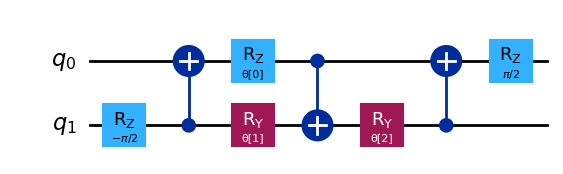

In [43]:
# Two qubit unitary as defined
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target

# Visual
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl")

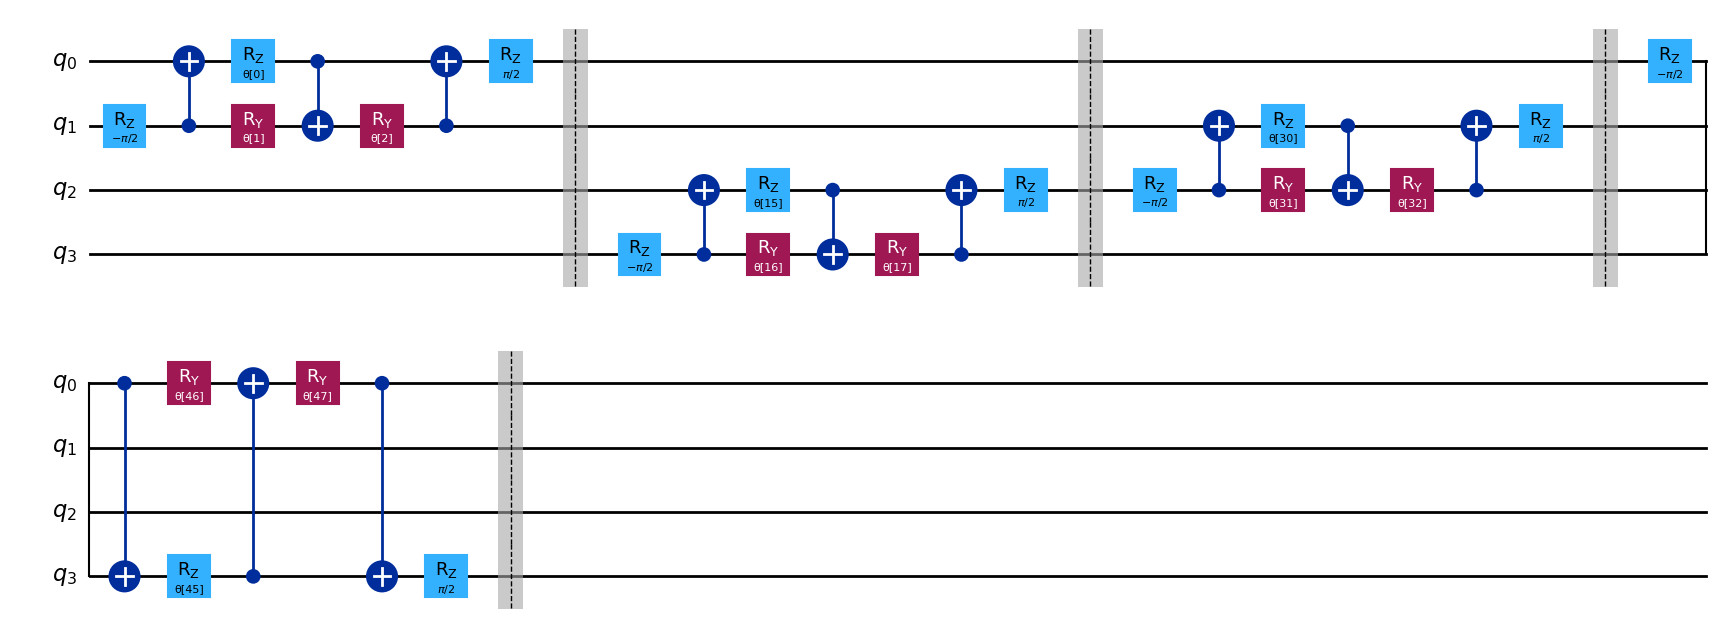

In [44]:
# Create Layer (Repeating Circuit on Neighboring Qubits).
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 15)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 15)]), [q1, q2])
        qc.barrier()
        param_index += 15
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 15)]), [q1, q2])
        qc.barrier()
        param_index += 15

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc

# Visual
circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl")

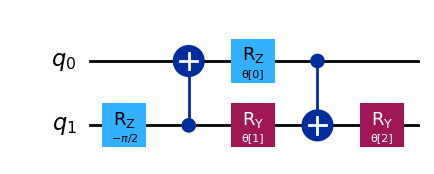

In [45]:
# Defining Pool Circuit
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target

# Visual
params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl")

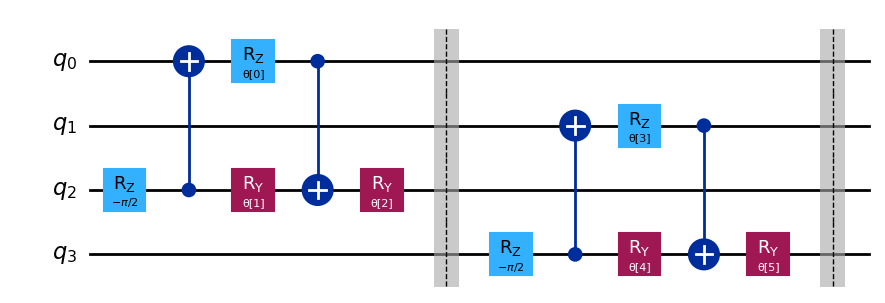

In [46]:
# Defining Pool Layer (Repeating Circuit on Neighboring Qubits)
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc

# Visual
sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl")

In [47]:
def generate_feature_map(num_qubits=8, depth=4, weight=None, state_params=None):

    print("depth:", depth)
    def create_feature_map(num_qubits, depth, weight):
        """
        Creates a Hardware Efficient Ansatz feature map following Algorithm 2
        Args:
            num_qubits (int): Number of qubits (8 for this case)
            depth (int): Circuit depth L
        Returns:
            QuantumCircuit: Feature map circuit
        """
        # Initialize circuit
        feature_map = QuantumCircuit(num_qubits, name="Feature Map")
        
        if (weight is None):
            # Generate random rotation parameters for U3 gates
            # Shape: (depth, num_qubits, 3) for the three rotation angles
            theta = np.random.uniform(0, 2*np.pi, size=(depth, num_qubits, 3))
        else:
            theta = weight[:depth]
            theta = np.concatenate([theta, theta], axis=1)

        # Implement the hardware efficient ansatz
        for d in range(depth):
            # First rotation layer - U3 gates on each qubit
            for i in range(int(num_qubits)):
                feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
            
            # First entangling layer - CZ gates on even-odd pairs
            for i in range(0, int(num_qubits)-1, 2):
                feature_map.cz(i, i + 1)
            # feature_map.barrier()
            
            # Second rotation layer - U3 gates on each qubit    
            for i in range(int(num_qubits)):
                feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
            
            # Second entangling layer - CZ gates offset by 1
            for i in range(1, int(num_qubits)-1, 2):
                feature_map.cz(i, i + 1)
            # Connect last qubit to first for circular entanglement
            # if int(num_qubits/2) % 2 == 0:
            #     feature_map.cz(int(num_qubits)-1, 0)
            feature_map.barrier()
        
        return feature_map

    def generate_input_maps(state_params,num_qubits):
        """
        Generates random input states by applying random U3 rotations
        Args:
            num_states (int): Number of input states to generate
            num_qubits (int): Number of qubits in circuit
        Returns:
            list[QuantumCircuit]: List of input state circuits
        """

        if (state_params is None):
            # Generate random angles for each qubit
            # We'll copy the state for qubits 0-3 to qubits 4-7
            state_params = np.random.uniform(0, 2*np.pi, size=(4, 3))

        input_states = []
        for _ in range(state_params.shape[0]):
            
            # Create input state circuit
            input_circuit = QuantumCircuit(num_qubits)
            
            # Apply rotations to first 4 qubits
            for i in range(4):
                input_circuit.u(state_params[i,0], 
                            state_params[i,1], 
                            state_params[i,2], i)
                # Copy same rotations to corresponding qubit in second half
                input_circuit.u(state_params[i,0], 
                            state_params[i,1], 
                            state_params[i,2], i+4)
                
            input_circuit.barrier()
            
            input_states.append(input_circuit)
        
        return input_states

    # Create and visualize the feature map
    initial_feature_map = create_feature_map(num_qubits, depth, weight)
    print("Feature Map Circuit:")
    display(initial_feature_map.draw("mpl"))

    # Generate and visualize sample input states
    input_states = generate_input_maps(state_params,num_qubits)
    print("\nExample Input State Circuit:")
    display(input_states[0].draw("mpl"))

    # Combine feature map with an input state to see complete circuit
    complete_circuit = input_states[0].compose(initial_feature_map)
    print("\nComplete Circuit (Input + Feature Map):")
    display(complete_circuit.draw("mpl"))

    return complete_circuit

depth: 0
Feature Map Circuit:


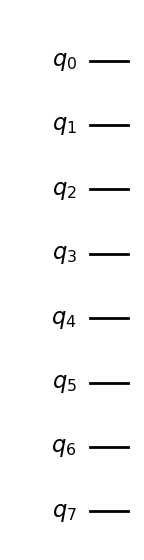


Example Input State Circuit:


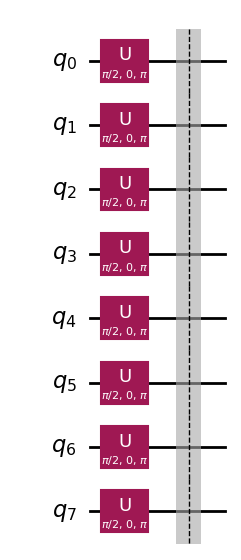


Complete Circuit (Input + Feature Map):


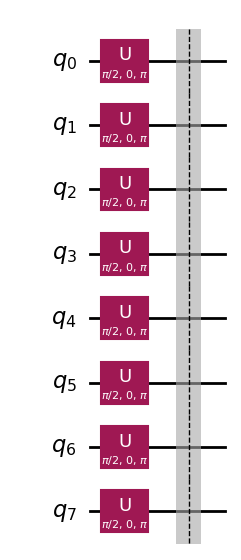

In [48]:
# Sample Generation
circuit.feature_map = generate_feature_map(num_qubits=8, depth=y[0], weight=wx[0], state_params=state_params_list[0])

In [49]:
def generate_feature_map(num_qubits=8, weight=None, depth = 4):
    params = ParameterVector("θ", (num_qubits*3)+(num_qubits*3*4))
    
    state_params = params[:num_qubits*3]
    weight = params[num_qubits*3:]
    
    """
    Creates a Hardware Efficient Ansatz feature map following Algorithm 2 (Combined with Input State)
    Args:
        num_qubits (int): Number of qubits (8 for this case)
        depth (int): Circuit depth L
    Returns:
        QuantumCircuit: Feature map circuit
    """
    # Initialize circuit
    feature_map = QuantumCircuit(num_qubits, name="Feature Map")
    
    if (state_params is None):
        # Generate random angles for each qubit
        # We'll copy the state for qubits 0-3 to qubits 4-7
        state_params = np.random.uniform(0, 2*np.pi, size=(8, 3))
    else:
        # Reshape state parameters into required shape
        state_params = np.array(state_params).reshape(8, 3)
        
        # Apply rotations to first 4 qubits
        for i in range(8):
            feature_map.u(state_params[i,0], 
                        state_params[i,1], 
                        state_params[i,2], i)
            
        feature_map.barrier()
        

    if (weight is None):
        # Generate random rotation parameters for U3 gates
        # Shape: (depth, num_qubits, 3) for the three rotation angles
        theta = np.random.uniform(0, 2*np.pi, size=(depth, num_qubits, 3))
    else:
        # Reshape weight parameters into required shape
        theta = np.array(weight).reshape(depth, num_qubits, 3)

    # Implement the hardware efficient ansatz
    
    for d in range(depth):
        # First rotation layer - U3 gates on each qubit
        for i in range(int(num_qubits)):
            feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
        
        # First entangling layer - CZ gates on even-odd pairs
        for i in range(0, int(num_qubits)-1, 2):
            feature_map.cz(i, i + 1)
        # feature_map.barrier()
        
        # Second rotation layer - U3 gates on each qubit    
        for i in range(int(num_qubits)):
            feature_map.u(theta[d,i,0], theta[d,i,1], theta[d,i,2], i)
        
        # Second entangling layer - CZ gates offset by 1
        for i in range(1, int(num_qubits)-1, 2):
            feature_map.cz(i, i + 1)
        # Connect last qubit to first for circular entanglement
        # if int(num_qubits/2) % 2 == 0:
        #     feature_map.cz(int(num_qubits)-1, 0)
        feature_map.barrier()

    return feature_map

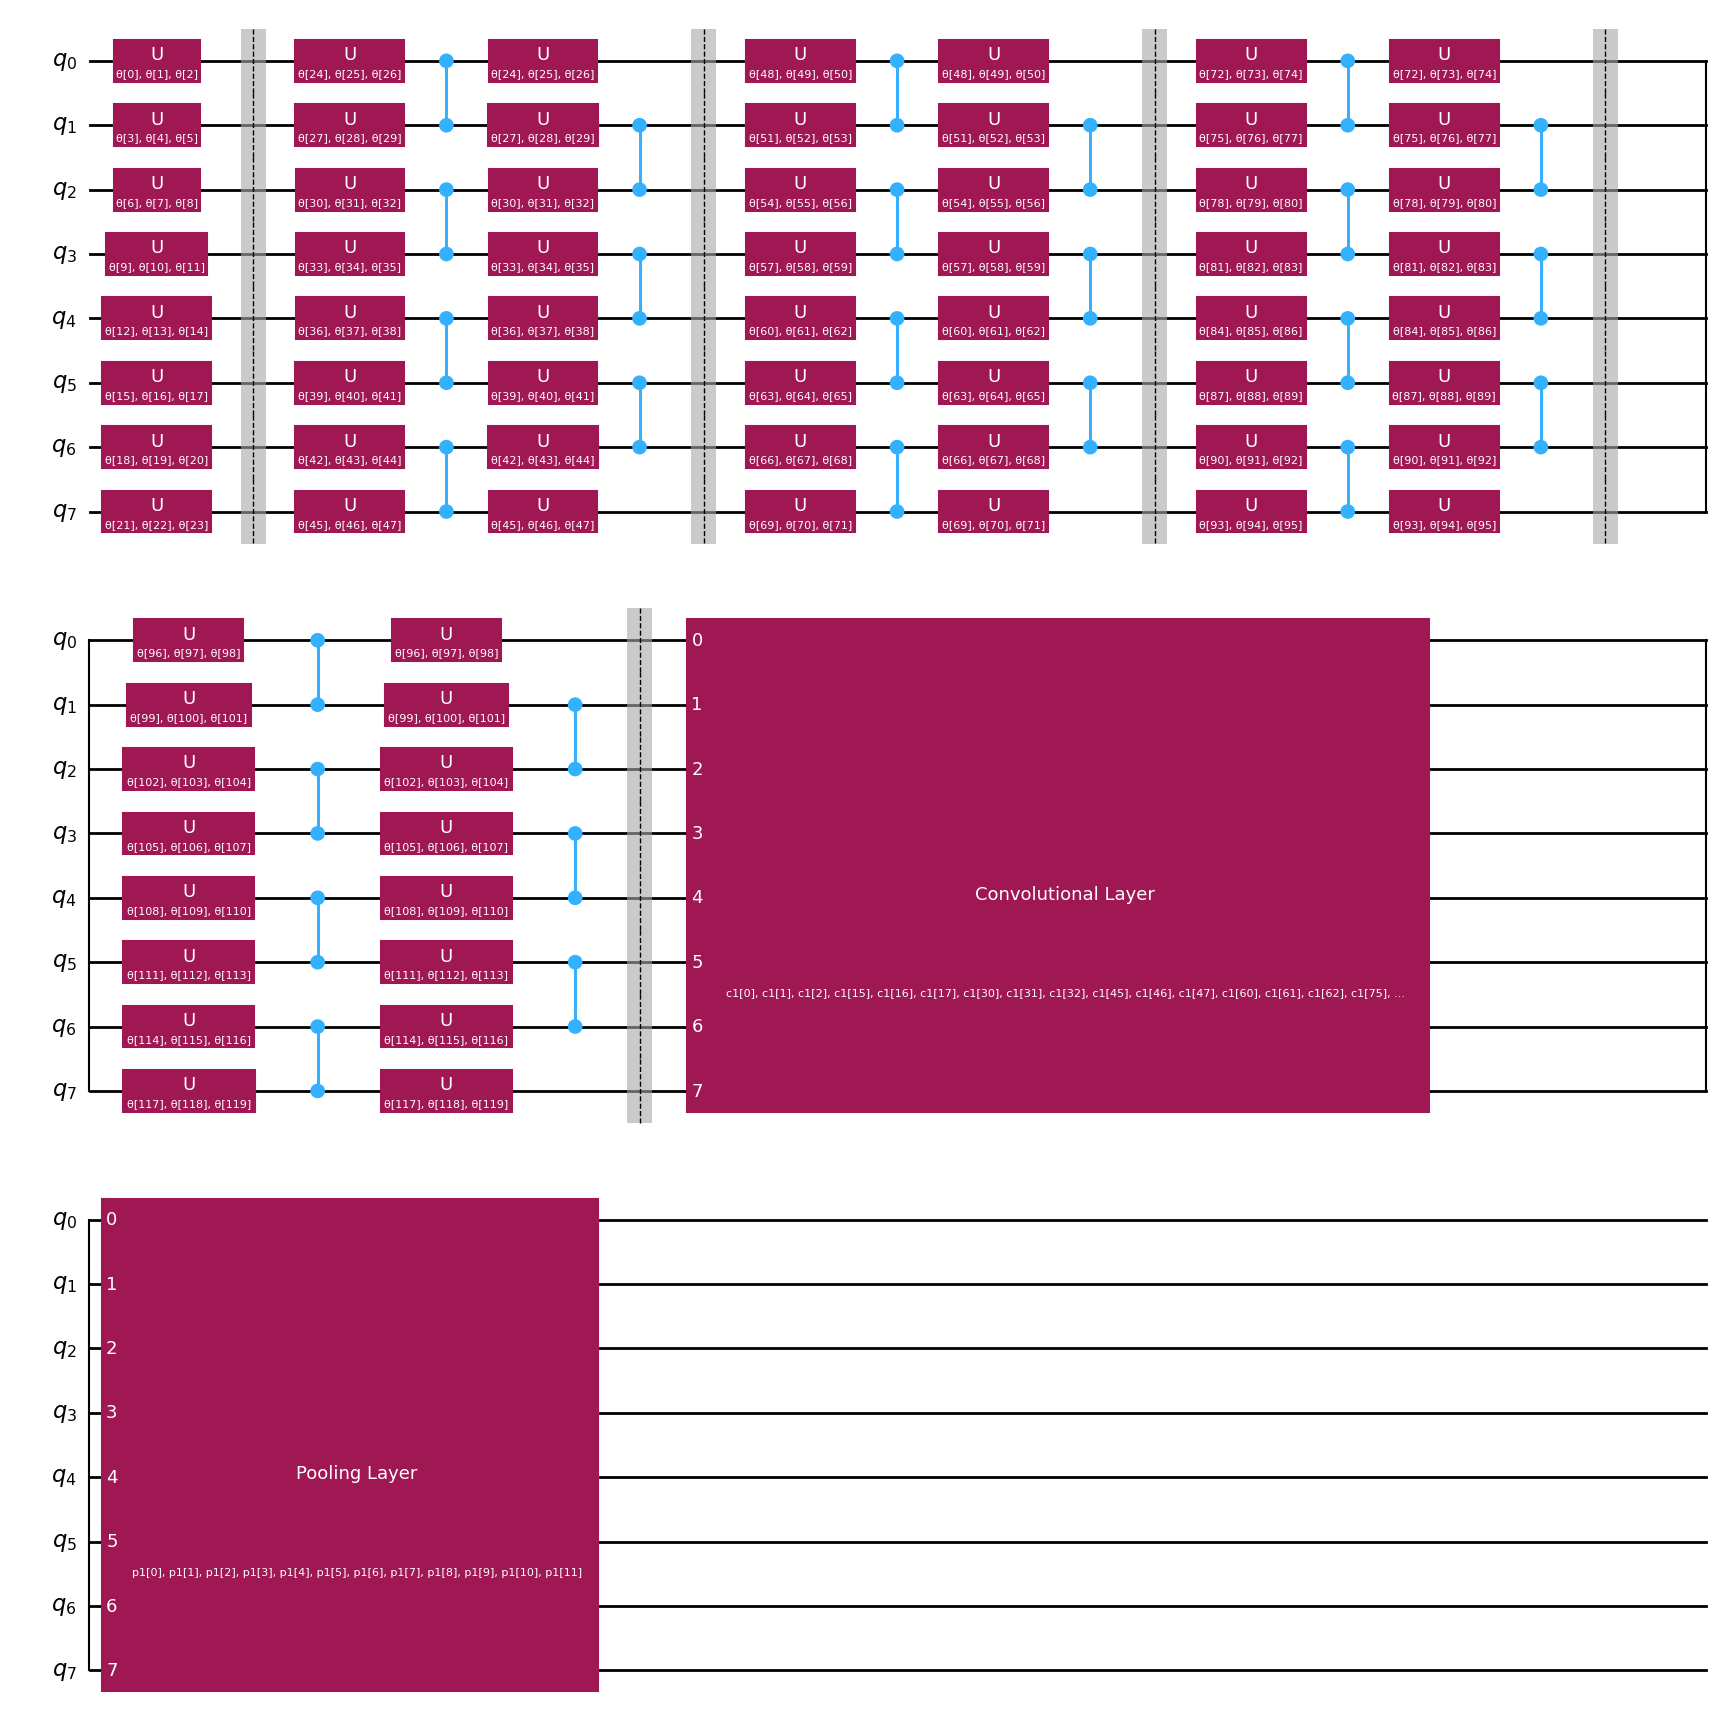

In [50]:
# Ansatz Instantiation Method
from qiskit import ClassicalRegister, QuantumRegister
def create_QCNN():
    q_reg = QuantumRegister(8, "q_reg")
    ansatz = QuantumCircuit(q_reg, name="Ansatz")

    # First Convolutional Layer
    ansatz.compose(conv_layer(8, "с1"), list(range(8)), inplace=True)

    # First Pooling Layer
    ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)

    # # Second Convolutional Layer
    # ansatz.compose(conv_layer(4, "c2"), list(range(4, 8)), inplace=True)

    # # Second Pooling Layer
    # ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)

    # # Third Convolutional Layer
    # ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)

    # Combining the feature map and ansatz
    circuit = QNNCircuit(8)
    circuit.feature_map = generate_feature_map(num_qubits=8)
    circuit.ansatz = ansatz
    return circuit

# Visual
display(create_QCNN().draw("mpl"))

In [51]:
# Tensor for Pytorch
x=x[:256]
x1=x1[:256]
y=y[:256]
y1=y1[:256]
X = torch.tensor(x, dtype=torch.float32).to("cuda")
Y = torch.tensor(y, dtype=torch.long).to("cuda")
X1 = torch.tensor(x1, dtype=torch.float32).to("cuda")
Y1 = torch.tensor(y1, dtype=torch.long).to("cuda")

In [52]:
# One-Hot Encoding for Final Processing
num_classes = 4
Y = (torch.nn.functional.one_hot(Y, num_classes=num_classes).float())
Y1 = (torch.nn.functional.one_hot(Y1, num_classes=num_classes).float())

In [53]:
print(X,Y,X1,Y1)

tensor([[ 1.7757e+00,  1.9448e+00,  2.4024e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.5708e+00,  0.0000e+00,  0.0000e+00,  ...,  3.4939e-02,
          3.1264e-03, -9.4424e-02],
        [ 1.6535e-01,  1.8480e-01,  2.4166e-01,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 7.4800e-01,  8.2673e-01,  1.0472e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.8326e+00,  1.3464e+00,  3.1416e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 4.9604e-01,  5.5440e-01,  7.2498e-01,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]], device='cuda:0') tensor([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]], device='cuda:0') tensor([[ 2.7227e+00,  2.8999e+00,  3.4907e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 2.3220e+00,  2.5432e+00,  3.1416e+00,  ...,  0.0000

In [54]:
# Training

In [55]:
# Pytorch Circuit Module
import torch.nn as nn
class Model(Module): # Simplified
    def __init__(self, qnn_module):
        super().__init__()
        self.qnn_module = qnn_module
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.qnn_module(x)
        x = self.softmax(x)
        return x

In [56]:
from qiskit_aer.primitives import Estimator
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.utils import algorithm_globals

# Reproducable seeds
num_qubits = 8
algorithm_globals.random_seed = 65
seed = 90

# Creating GPU compatible Estimator primitive
sampler = Estimator()
sampler.set_options(device='GPU')
sampler.set_options(method="statevector")
sampler.set_options(seed = seed)

# Setting observables on 15th and 16th qubits.
observable_z5 = SparsePauliOp.from_sparse_list([("Z", [4], 1)], num_qubits=num_qubits)
observable_z6 = SparsePauliOp.from_sparse_list([("Z", [5], 1)], num_qubits=num_qubits)
observable_z7 = SparsePauliOp.from_sparse_list([("Z", [6], 1)], num_qubits=num_qubits)
observable_z8 = SparsePauliOp.from_sparse_list([("Z", [7], 1)], num_qubits=num_qubits)
observables = [observable_z5, observable_z6, observable_z7, observable_z8]

# Instantiating underlying EstimatorQNN
estimator = EstimatorQNN(
    estimator = sampler,
    circuit = create_QCNN(),
    observables = observables,
    input_gradients = True,
)

# Initial Forward Weights
weights = algorithm_globals.random.random(estimator.num_weights)

# Checking Data Forward Result
estimator.forward(input_data = x1[:30], weights = weights)

/tmp/ipykernel_5510/1858059801.py:24: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  estimator = EstimatorQNN(
/tmp/ipykernel_5510/1858059801.py:24: UserWarning: No number of qubits was not specified (None) and was retrieved from `circuit` (8). If `circuit` is transpiled, this may cause unstable behaviour.
  estimator = EstimatorQNN(


array([[ 0.27734375, -0.08007812, -0.24414062,  0.32617188],
       [ 0.46679688,  0.25      ,  0.03515625,  0.37109375],
       [ 0.12890625, -0.2578125 , -0.13671875,  0.25585938],
       [-0.08984375, -0.23828125, -0.14648438, -0.03515625],
       [ 0.0078125 , -0.28320312, -0.22070312,  0.19726562],
       [ 0.09960938,  0.01757812, -0.40039062,  0.44335938],
       [ 0.17578125, -0.140625  , -0.20703125,  0.46679688],
       [ 0.24804688, -0.1171875 , -0.14648438,  0.3046875 ],
       [ 0.01367188,  0.05664062,  0.015625  ,  0.09765625],
       [-0.13867188, -0.2421875 , -0.07226562,  0.25195312],
       [ 0.09179688, -0.0546875 , -0.421875  ,  0.54882812],
       [ 0.09179688,  0.07226562,  0.2890625 ,  0.3515625 ],
       [ 0.11523438, -0.19140625, -0.1875    ,  0.15820312],
       [-0.02539062,  0.01953125, -0.02734375,  0.03125   ],
       [ 0.33984375, -0.09570312, -0.21484375,  0.3203125 ],
       [ 0.171875  ,  0.06835938, -0.17578125,  0.05664062],
       [ 0.12695312, -0.

In [57]:
# Wrapping estimator with initial weights under TorchConnecter, itself under Pytorch Module.
model = Model(TorchConnector(estimator, weights))
model.to("cuda")
next(model.parameters()).is_cuda

True

In [58]:
# We want to supply one-hot encoded labels.
from tensorflow.keras.losses import CategoricalCrossentropy
loss_func = CategoricalCrossentropy()

# Callback Helper Functions
def accuracy(output, Y):
    acc = 0
    for ix in range(Y.size(dim=0)):
        val = output[ix]
        if (torch.argmax(val) == torch.argmax(Y[ix])):
            acc+=1
    return ((acc/(Y.size(dim=0)))*100)

def objective_function(weights):
    global X
    global Y
    # if(ix != 1 and ix%333 == 0):
    #     indices = torch.randperm(X.size()[0])
    #     X=X[indices]
    #     Y=Y[indices]
    #     print(X,Y)
    # Referencing Global Variables
    global data
    # Local Variable
    total_loss = 0.0
    # Overiding with new data
    model = Model(TorchConnector(estimator, weights)).to("cuda")
    # Getting Output
    output = model(X)
    output1 = model(X1)
    loss_output = output.detach().cpu().numpy()
    loss_output1 = output1.detach().cpu().numpy()
    loss_Y = Y.detach().cpu().numpy()
    loss_Y1 = Y1.detach().cpu().numpy()
    # Calculate Loss
    loss = loss_func(loss_output, loss_Y).numpy()
    loss1 = loss_func(loss_output1, loss_Y1).numpy()
    # Calculate Accuracy
    acc = accuracy(output, Y)
    # Calculate Test Accuracy
    test_acc = accuracy(output1, Y1)
    # Append Checkpoint Data Points to Tracker
    val = f"Iteration: {ix}; Accuracy: {acc}%; Loss: {loss}; Test Accuracy: {test_acc}%"
    data.append(val)
    total_loss += loss
    loss_list.append(total_loss)
    accuracy_list.append(acc)
    test_accuracy_list.append(test_acc)
    return total_loss

def callback(weights):
    # Iteration Tracking
    global ix
    global weight_list
    # Printing Checkpoint Data Points in Tracker
    print("\n".join(data))
    
    # Create figure with three subplots side by side
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    
    # Plot accuracy
    ax1.set_title("Accuracy against iteration")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Accuracy (%)")
    ax1.plot(range(len(accuracy_list)), accuracy_list)
    
    # Plot test accuracy
    ax2.set_title("Test Accuracy against iteration")
    ax2.set_xlabel("Iteration") 
    ax2.set_ylabel("Test Accuracy (%)")
    ax2.plot(range(len(test_accuracy_list)), test_accuracy_list)
    
    # Plot loss
    ax3.set_title("Loss value against iteration") 
    ax3.set_xlabel("Iteration")
    ax3.set_ylabel("Loss function value")
    ax3.plot(range(len(loss_list)), loss_list)
    
    plt.tight_layout()
    plt.show()
    
    # Printing Weights
    weight_list.append(weights)
    print(weights)
    # Iteration Counter
    ix+=1
    # Clearing Previous Graph/Weights
    clear_output(wait=True)

In [59]:
# Training Function
def fit(test_accuracylist=None, accuracylist=None, weights=None, losslist=None, iter= 1000, fresh_start = False):
    global ix
    global data
    global weight_list
    global loss_list
    global accuracy_list
    global test_accuracy_list
    if(fresh_start):
        loss_list = []
        accuracy_list = []
        test_accuracy_list = []
        data = []
        weight_list = []
        weights = algorithm_globals.random.random(estimator.num_weights)
        ix = 1
    else:
        if 'data' not in globals(): data = []
        else: data = data
        if 'weight_list' not in globals():weight_list = []
        else: weight_list = weight_list
        if 'ix' not in globals() and 'ix' not in locals(): ix = 1
        else: ix = ix
        if losslist is not None: losslist = losslist
        elif (('loss_list' not in globals() and 'loss_list' not in locals()) and losslist == None): loss_list = []
        elif 'loss_list' not in globals() and 'loss_list' not in locals(): loss_list = losslist
        else: loss_list = loss_list
        if accuracylist is not None: accuracylist = accuracylist
        elif (('accuracy_list' not in globals() and 'accuracy_list' not in locals()) and accuracylist == None): accuracy_list = []
        elif 'accuracy_list' not in globals() and 'accuracy_list' not in locals(): accuracy_list = accuracylist
        else: accuracy_list = accuracy_list
        if test_accuracylist is not None: test_accuracylist = test_accuracylist
        elif (('test_accuracy_list' not in globals() and 'test_accuracy_list' not in locals()) and test_accuracylist == None): test_accuracy_list = []
        elif 'test_accuracy_list' not in globals() and 'test_accuracy_list' not in locals(): test_accuracy_list = test_accuracylist
        else: test_accuracy_list = test_accuracy_list
        if weights is not None: weights = weights
        elif (('result' not in locals() and 'result' not in globals())) and weights == None:
            weights = algorithm_globals.random.random(estimator.num_weights)
        elif (len(weight_list)>0):
            weights = weight_list[-1]
        else:
            weights = result[0].x
            loss_list = result[2]
    
    result = minimize(
        fun=objective_function,
        callback = callback,
        x0=weights,
        method='COBYLA',
        options={'maxiter': iter},
    )
    return result, data, loss_list, weight_list, accuracy_list, test_accuracy_list

Iteration: 1; Accuracy: 35.15625%; Loss: 12.046281814575195; Test Accuracy: 31.666666666666664%
Iteration: 2; Accuracy: 24.609375%; Loss: 12.112902641296387; Test Accuracy: 20.0%
Iteration: 3; Accuracy: 30.078125%; Loss: 11.99071979522705; Test Accuracy: 30.0%
Iteration: 4; Accuracy: 28.125%; Loss: 11.972129821777344; Test Accuracy: 29.166666666666668%
Iteration: 5; Accuracy: 28.125%; Loss: 11.908055305480957; Test Accuracy: 30.833333333333336%
Iteration: 6; Accuracy: 28.90625%; Loss: 11.925787925720215; Test Accuracy: 30.833333333333336%
Iteration: 7; Accuracy: 28.90625%; Loss: 11.94832992553711; Test Accuracy: 25.0%
Iteration: 8; Accuracy: 25.78125%; Loss: 12.035842895507812; Test Accuracy: 27.500000000000004%
Iteration: 9; Accuracy: 25.0%; Loss: 12.024179458618164; Test Accuracy: 29.166666666666668%
Iteration: 10; Accuracy: 24.609375%; Loss: 12.05238151550293; Test Accuracy: 28.333333333333332%
Iteration: 11; Accuracy: 28.125%; Loss: 11.831306457519531; Test Accuracy: 37.5%
Iteratio

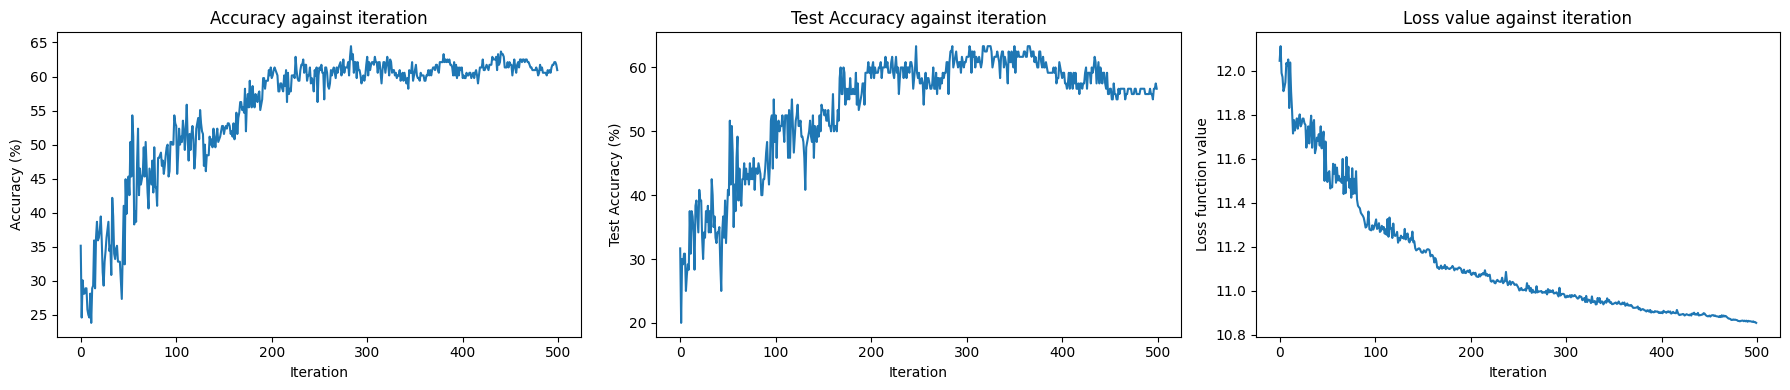

[-9.55747072e-02  9.67042740e-01  1.58046250e+00  1.51640409e+00
  7.48293894e-01  1.18726904e+00 -7.43057392e-02 -6.84345065e-01
 -5.90395859e-01  8.44912742e-01  4.26498819e-01  1.76619878e+00
  1.95336096e+00  1.31915749e+00 -8.49704561e-01  3.61126748e-01
 -3.77746076e-01  5.11085261e-01 -3.63118527e-01 -5.81912094e-01
  6.51335651e-01 -4.74908882e-01 -7.17254235e-02  3.72440764e-01
  1.38792344e-03  1.23559201e-01  9.05971641e-02  3.33112078e+00
 -8.22336180e-01  3.32500841e-01 -1.78710247e-01 -9.63912774e-02
 -5.99242997e-01  1.34969559e+00  1.24801103e+00 -6.44295650e-01]


In [60]:
# Call Training Function and Save as Result
result = fit(iter=500, fresh_start=True)

In [61]:
savemodel = Model(TorchConnector(estimator, result[0].x))
print(next(model.parameters()).is_cuda)
torch.save(savemodel, "4Qubits(One_Hot)_256")

True


In [62]:
evalmodel = torch.load("4Qubits(One_Hot)_256", weights_only=False).to("cuda")
evalmodel.eval()
output0 = evalmodel(X)
output1 = evalmodel(X1)
print(f"Train Accuracy: {accuracy(output0, Y)}%")
print(f"Test Accuracy: {accuracy(output1, Y1)}%")

Train Accuracy: 60.9375%
Test Accuracy: 56.666666666666664%


In [63]:
def translate(array):
    arr = []
    for e in array:
        arr.append(torch.argmax(e))
    return arr
print(f"output 0: {translate(output0)}, \n Y:       {translate(Y)}, \n output 1: {translate(output1)}, \n Y1:       {translate(Y1)}")

output 0: [tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(3, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(1, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0,

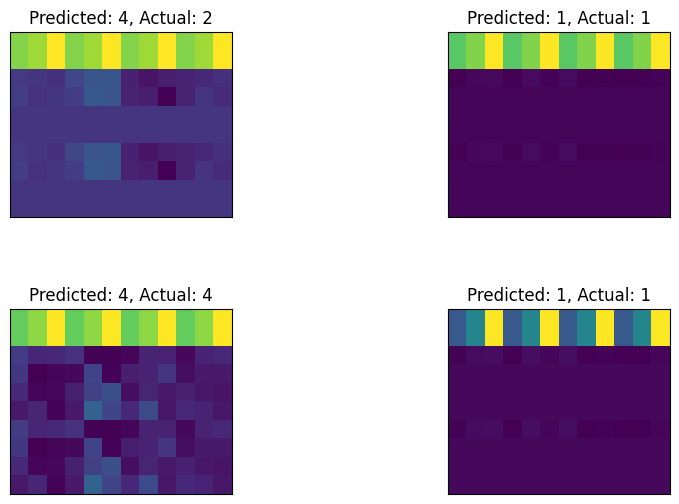

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})
for ix in range(0, 4):
    depth = X1.detach().cpu().numpy()[ix]
    predicted = torch.argmax(output1[ix]).item() + 1  # Add 1 to get range 1-4
    actual = torch.argmax(Y1[ix]).item() + 1  # Add 1 to get range 1-4
    
    # Reshape depth array into a 2D image
    depth_img = depth.reshape(int(np.sqrt(len(depth))), -1)
    
    # Display as image instead of line plot
    im = ax[ix // 2, ix % 2].imshow(depth_img, cmap='viridis')
    ax[ix // 2, ix % 2].set_title(f"Predicted: {predicted}, Actual: {actual}")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [65]:
print(result)

( message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 10.853157043457031
       x: [-9.557e-02  9.670e-01 ...  1.248e+00 -6.443e-01]
    nfev: 500
   maxcv: 0.0, ['Iteration: 1; Accuracy: 35.15625%; Loss: 12.046281814575195; Test Accuracy: 31.666666666666664%', 'Iteration: 2; Accuracy: 24.609375%; Loss: 12.112902641296387; Test Accuracy: 20.0%', 'Iteration: 3; Accuracy: 30.078125%; Loss: 11.99071979522705; Test Accuracy: 30.0%', 'Iteration: 4; Accuracy: 28.125%; Loss: 11.972129821777344; Test Accuracy: 29.166666666666668%', 'Iteration: 5; Accuracy: 28.125%; Loss: 11.908055305480957; Test Accuracy: 30.833333333333336%', 'Iteration: 6; Accuracy: 28.90625%; Loss: 11.925787925720215; Test Accuracy: 30.833333333333336%', 'Iteration: 7; Accuracy: 28.90625%; Loss: 11.94832992553711; Test Accuracy: 25.0%', 'Iteration: 8; Accuracy: 25.78125%; Loss: 12.035842895507812; Test Accuracy: 27.500000000000004%', 'Iteration: 9; Accuracy: 25.0%; Loss: 

In [66]:
# Iteration Value Display Error (Skips back to 3)
result[1]

['Iteration: 1; Accuracy: 35.15625%; Loss: 12.046281814575195; Test Accuracy: 31.666666666666664%',
 'Iteration: 2; Accuracy: 24.609375%; Loss: 12.112902641296387; Test Accuracy: 20.0%',
 'Iteration: 3; Accuracy: 30.078125%; Loss: 11.99071979522705; Test Accuracy: 30.0%',
 'Iteration: 4; Accuracy: 28.125%; Loss: 11.972129821777344; Test Accuracy: 29.166666666666668%',
 'Iteration: 5; Accuracy: 28.125%; Loss: 11.908055305480957; Test Accuracy: 30.833333333333336%',
 'Iteration: 6; Accuracy: 28.90625%; Loss: 11.925787925720215; Test Accuracy: 30.833333333333336%',
 'Iteration: 7; Accuracy: 28.90625%; Loss: 11.94832992553711; Test Accuracy: 25.0%',
 'Iteration: 8; Accuracy: 25.78125%; Loss: 12.035842895507812; Test Accuracy: 27.500000000000004%',
 'Iteration: 9; Accuracy: 25.0%; Loss: 12.024179458618164; Test Accuracy: 29.166666666666668%',
 'Iteration: 10; Accuracy: 24.609375%; Loss: 12.05238151550293; Test Accuracy: 28.333333333333332%',
 'Iteration: 11; Accuracy: 28.125%; Loss: 11.8313